In [1]:
using EVQueues, Plots, ProgressMeter

In [2]:
lambda=80.0;
mu=1.0;
gamma=0.5;
C=60.0;

Tfinal=50.0;
snaps = collect(0.1:0.5:Tfinal);

In [3]:
df = generate_Poisson_stream(lambda,mu,gamma,Tfinal);

In [4]:
sim = ev_edf_trace(df,C,snapshots=snaps);
compute_statistics!(sim)

Simulando... 100%|██████████████████████████████████████| Time: 0:00:01


In [5]:
##Trabajo no cumplido
sim.stats.avgW

0.2057550909206665

Creando animacion... 100%|██████████████████████████████| Time: 0:00:10
┌ Info: Saved animation to 
│   fn = /tmp/anim.gif
└ @ Plots /home/andres/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim.gif")
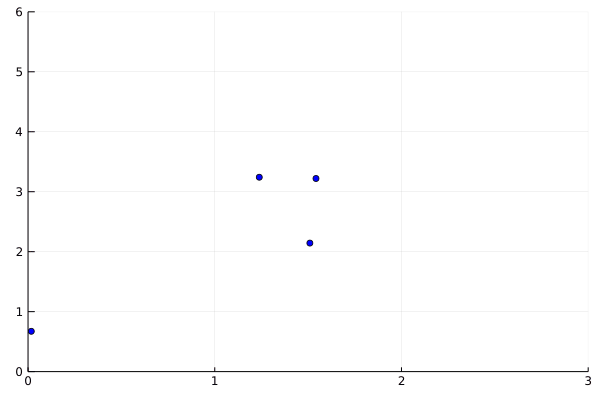

In [6]:
prog=Progress(length(snaps), dt=1, desc="Creando animacion... ");

anim = @animate for snapshot in sim.snapshots

    charging = [ev for ev in snapshot.charging]
    w = [ev.currentWorkload for ev in charging]
    d = [ev.currentDeadline for ev in charging]
    u = [ev.currentPower for ev in charging]

    p=scatter(w[u.>0],d[u.>0],markershape=:circle,color=:blue,legend=:none,xlims = (0,3/mu), ylims = (0,3/gamma));
    scatter!(p,w[u.==0],d[u.==0],markershape=:circle,color=:red,legend=:none);

    next!(prog);
end

gif(anim, "/tmp/anim.gif", fps = 10)

In [7]:
using Distributions

sigma=1.0

perturbation = Normal(0,sigma)

reportedDeadlines = [d+rand(perturbation) for d in df[!,:salidas]]
df[:salidaReportada] = reportedDeadlines

sim = ev_edf_trace(df,C,snapshots=snaps);
compute_statistics!(sim)

In [8]:
sim.stats.avgW

0.2088493228785617

Creando animacion... 100%|██████████████████████████████| Time: 0:00:03
┌ Info: Saved animation to 
│   fn = /tmp/anim.gif
└ @ Plots /home/andres/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim.gif")
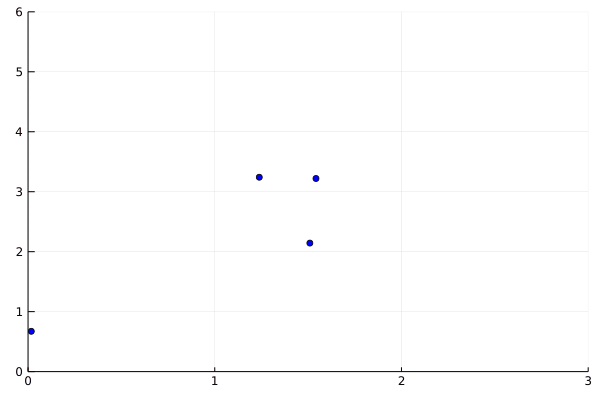

In [9]:
prog=Progress(length(snaps), dt=1, desc="Creando animacion... ");

anim = @animate for snapshot in sim.snapshots

    charging = [ev for ev in snapshot.charging]
    w = [ev.currentWorkload for ev in charging]
    d = [ev.currentDeadline for ev in charging]
    u = [ev.currentPower for ev in charging]

    p=scatter(w[u.>0],d[u.>0],markershape=:circle,color=:blue,legend=:none,xlims = (0,3/mu), ylims = (0,3/gamma));
    scatter!(p,w[u.==0],d[u.==0],markershape=:circle,color=:red,legend=:none);

    next!(prog);
end

gif(anim, "/tmp/anim.gif", fps = 10)

In [10]:
sim2 = ev_lifo_trace(df,C,snapshots=snaps);
compute_statistics!(sim2)

In [11]:
sim2.stats.avgW

0.22770293306596823